In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [9]:
path="familia.csv"
df=pd.read_csv(path)
df.head()

,A,kg,edad,hijos
0,4,45,20,0
1,4,90,40,0
2,4,75,56,0
3,4,60,76,4
4,4,63,46,2


In [11]:
dn=df.drop(columns=['kg','hijos'],axis=1)
dn.head()

,A,edad
0,4,20
1,4,40
2,4,56
3,4,76
4,4,46


In [12]:
#saber cuantos O-rings sufren calentamiento
target = df.iloc[:, 1].values
x = dn.iloc[:, :].values
#print(x)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, target, test_size=0.1)

In [14]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [15]:
lr.score(X_test, Y_test)

0.0

In [16]:
scores = cross_val_score(lr, x,target, cv=2, scoring='neg_mean_squared_error')

In [17]:
scores.mean()

-238.76710510745244

In [18]:
scores.std()

89.65595845828904

In [19]:
scores = cross_val_score(lr, x,target, cv=3, scoring='r2')

In [20]:
scores.mean()

-0.40496082360840147

In [21]:
scores.std()

0.2981290918157004

In [22]:
print('y = ' + str(lr.intercept_) + ' ')

y = 56.84012191742866 


In [23]:
for i, c in enumerate(lr.coef_):
          print(str(c) + ' * x' + str(i))

0.0 * x0
0.1541516578923062 * x1


In [24]:
x=dn.iloc[:, :-1].values

the r-squared is:  0.6207055885946893
the coefficient (value of a) for edad, estatura, man_a is:  [ -3.0723391   20.61361205 455.25909253]


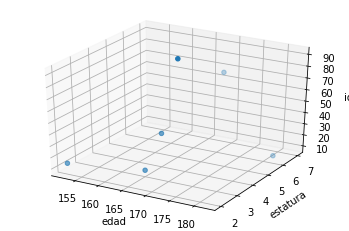

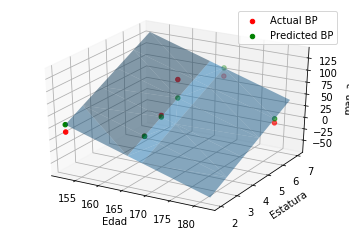

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create arrays for the data points
X = []
Y = []

#read the csv file
csvReader = open('medidas.csv')

#skips the header line
csvReader.readline()

for line in csvReader:
    y, x1, x2 = line.split(',')
    X.append([float(x1), float(x2), 1]) # add the bias term at the end
    Y.append(float(y))

# use numpy arrays so that we can use linear algebra later
X = np.array(X)
Y = np.array(Y)

# graph the data
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_xlabel('edad')
ax.set_ylabel('estatura')
ax.set_zlabel('id')

# Use Linear Algebra to solve
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
predictedY = np.dot(X, a)

# calculate the r-squared
SSres = Y - predictedY
SStot = Y - Y.mean()
rSquared = 1 - (SSres.dot(SSres) / SStot.dot(SStot))
print("the r-squared is: ", rSquared)
print("the coefficient (value of a) for edad, estatura, man_a is: ", a)

# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot(a)

# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='r', label='Actual BP')
ax.scatter(X[:, 0], X[:, 1], predictedY, color='g', label='Predicted BP')
ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
ax.set_xlabel('edad')
ax.set_ylabel('estatura')
ax.set_zlabel('id')
ax.legend()
plt.show()